# Testing simple shower shapes

Tested a few simple showers shape for the edatasets. Plotted for incomplete and complete tracksters. As seen by total energy datasets are quite biased in energy. Not sure if eta, phi could have been computed with this dataset.

In [3]:
import numpy as np
import awkward as ak
import uproot
import src.functions as fn
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pylab import cm
import networkx as nx

In [34]:
def ld(vertices_z,vertices_E):
    if(vertices_z[0]<0):
        offset=320
    else:
        offset=-320
    
    ldVal=sum((vertices_z+offset)*vertices_E)
    return ldVal

def delta_RT(vertices_x,vertices_y,vertices_E,Eweighted=False):
    argmax_E=ak.argmax(vertices_E)
                       
    vEmax_x=vertices_x[argmax_E]
    vEmax_y=vertices_y[argmax_E]
    RvEmax=np.sqrt(vEmax_x**2+vEmax_y**2)
    
    R=np.sqrt(vertices_x**2+vertices_y**2)
    
    if(Eweighted):
        delta_R=sum((R-RvEmax)**2*vertices_E/vertices_E[argmax_E])
    else:
        delta_R=sum((R-RvEmax)**2)
        
    return delta_R

def delta_R(vertices_x,vertices_y,vertices_z,vertices_E,Eweighted=False):
    argmax_E=ak.argmax(vertices_E)
                       
    vEmax_x=vertices_x[argmax_E]
    vEmax_y=vertices_y[argmax_E]
    vEmax_z=vertices_z[argmax_E]
    RvEmax=np.sqrt(vEmax_x**2+vEmax_y**2+vEmax_z**2)
    
    R=np.sqrt(vertices_x**2+vertices_y**2+vertices_z**2)
    
    delta_R=sum((R-RvEmax)**2)
        
    return delta_R

def delta_RT_std(vertices_x,vertices_y,vertices_E,Eweighted=False):
    argmax_E=ak.argmax(vertices_E)
                       
    vEmax_x=vertices_x[argmax_E]
    vEmax_y=vertices_y[argmax_E]
    RvEmax=np.sqrt(vEmax_x**2+vEmax_y**2)
    
    R=np.sqrt((vertices_x-vEmax_x)**2+(vertices_y-vEmax_y)**2)

    delta_R_std=np.sqrt(np.abs(sum(R**2)-sum(R)**2))
        
    return delta_R_std
                       
def maxE_z(vertices_z,vertices_E):
    argmax_E=ak.argmax(vertices_E)
    if(vertices_z[0]<0):
        maxE_z=-1*(vertices_z[argmax_E]+320)
    else:
        maxE_z=(vertices_z[argmax_E]-320)
    return maxE_z
    
def sd(vertices_z,vertices_E):
    ldVal=ld(vertices_z,vertices_E)
    E_tot=ak.sum(vertices_E)
    return ldVal/E_tot

def maxAbsZ(vertices_z):
    if(vertices_z[0]<0):
        maxZ=ak.min(vertices_z)
    else:
        maxZ=ak.max(vertices_z)
    return abs(maxZ)


In [36]:
filename2 = "/afs/cern.ch/user/d/dmagdali/CernCentralityProject/tracksters_ds_10e.root"
datasetName="10e dataset"
file2 = uproot.open(filename2)
tracksters10e=file2['tracksters']

In [37]:
print(tracksters10e.keys())
vertices10e_Labels=tracksters10e['trackster_label'].array()
vertices10e_indexes=tracksters10e['vertices_indexes'].array()
vertices10e_x = tracksters10e['vertices_x'].array()
vertices10e_y = tracksters10e['vertices_y'].array()
vertices10e_z = tracksters10e['vertices_z'].array()
vertices10e_E = tracksters10e['vertices_energy'].array()


['nvertices_x', 'vertices_x', 'nvertices_y', 'vertices_y', 'nvertices_z', 'vertices_z', 'nvertices_energy', 'vertices_energy', 'nvertices_indexes', 'vertices_indexes', 'trackster_label', 'trackster_event']


In [ ]:
edges10e = fn.edgeBuilderNNTr(vertices10e_indexes, vertices10e_x, vertices10e_y, vertices10e_z, vertices10e_E)

In [38]:
tooSmall = ak.num(vertices10e_indexes,axis=-1) > 2

In [39]:
vertices10e_indexes_g = vertices10e_indexes[tooSmall]
vertices10e_x_g = vertices10e_x[tooSmall]
vertices10e_y_g = vertices10e_y[tooSmall]
vertices10e_z_g = vertices10e_z[tooSmall]
vertices10e_E_g = vertices10e_E[tooSmall]
vertices10e_Labels_g=vertices10e_Labels[tooSmall]

In [40]:
comLd=[]
inComLd=[]
comSd=[]
inComSd=[]
comDelta_R=[]
inComDelta_R=[]
comDelta_RT=[]
inComDelta_RT=[]
comTotE=[]
inComTotE=[]
comDelta_RT_Eweighted=[]
inComDelta_RT_Eweighted=[]
comMaxE_z=[]
inComMaxE_z=[]
comMaxAbs_z=[]
inComMaxAbs_z=[]
comDelta_RT_std=[]
inComDelta_RT_std=[]

N_tr = len(vertices10e_indexes_g)
#N_tr=10000

for i in range(N_tr):
    v_ind=vertices10e_indexes_g[i]
    v_x=vertices10e_x_g[i] 
    v_y=vertices10e_y_g[i]
    v_z=vertices10e_z_g[i]
    v_E=vertices10e_E_g[i] 
    """
    edges_1 = fn.edgeBuilderNew(
        v_ind,
        v_x, 
        v_y, 
        v_z, 
        v_E
    )
    edges_1 = ak.flatten(edges_1[ak.num(edges_1) > 0].to_list())
    """
    if(vertices10e_Labels_g[i]==1):
        comLd.append(ld(v_z,v_E))
        comSd.append(sd(v_z,v_E))
        comDelta_R.append(delta_R(v_x,v_y,v_z,v_E))
        comDelta_RT.append(delta_RT(v_x,v_y,v_E))
        comDelta_RT_Eweighted.append(delta_RT(v_x,v_y,v_E,True))
        comTotE.append(ak.sum(v_E))
        comMaxE_z.append(maxE_z(v_z,v_E))
        comMaxAbs_z.append(maxAbsZ(v_z))
        comDelta_RT_std.append(delta_RT_std(v_x,v_y,v_E))
    else:
        inComLd.append(ld(v_z,v_E))
        inComSd.append(sd(v_z,v_E))
        inComDelta_R.append(delta_R(v_x,v_y,v_z,v_E))
        inComDelta_RT.append(delta_RT(v_x,v_y,v_E))
        inComDelta_RT_Eweighted.append(delta_RT(v_x,v_y,v_E,True))
        inComTotE.append(ak.sum(v_E))
        inComMaxE_z.append(maxE_z(v_z,v_E))
        inComMaxAbs_z.append(maxAbsZ(v_z))
        inComDelta_RT_std.append(delta_RT_std(v_x,v_y,v_E))



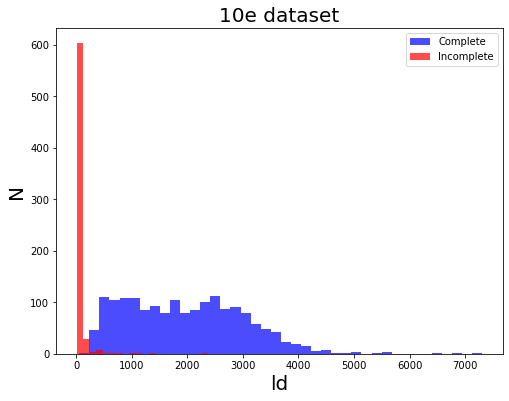

In [41]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comLd, bins=40, color='b', alpha=0.7,label='Complete')
plt.hist(inComLd, bins=20, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("ld",fontsize=20)
plt.title(datasetName,fontsize=20)
plt.show()

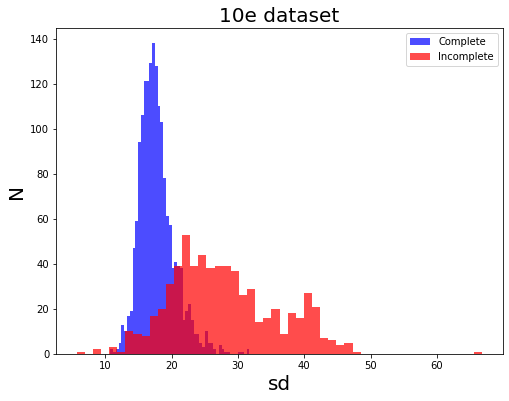

In [42]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comSd, bins=50, color='b', alpha=0.7,label='Complete')
plt.hist(inComSd, bins=50, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("sd",fontsize=20)
plt.title(datasetName,fontsize=20)
plt.show()

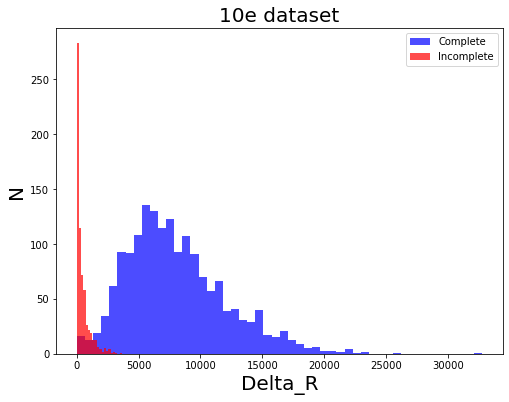

In [51]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comDelta_R, bins=50, color='b', alpha=0.7,label='Complete')
plt.hist(inComDelta_R, bins=20, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Delta_R",fontsize=20)
plt.title(datasetName,fontsize=20)
plt.show()

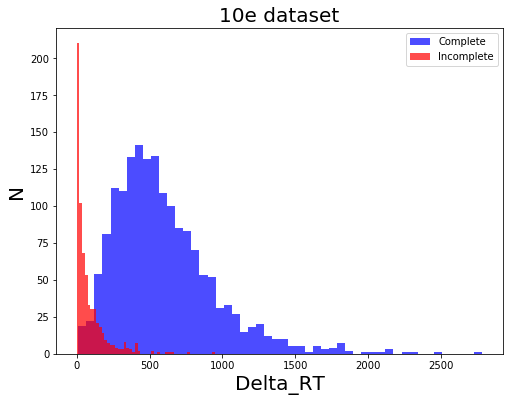

In [44]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comDelta_RT, bins=50, color='b', alpha=0.7,label='Complete')
plt.hist(inComDelta_RT, bins=50, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Delta_RT",fontsize=20)
plt.title(datasetName,fontsize=20)
plt.show()

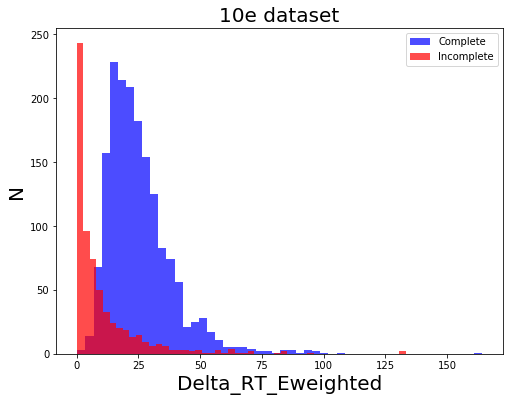

In [45]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comDelta_RT_Eweighted, bins=50, color='b', alpha=0.7,label='Complete')
plt.hist(inComDelta_RT_Eweighted, bins=50, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Delta_RT_Eweighted",fontsize=20)
plt.title(datasetName,fontsize=20)
plt.show()

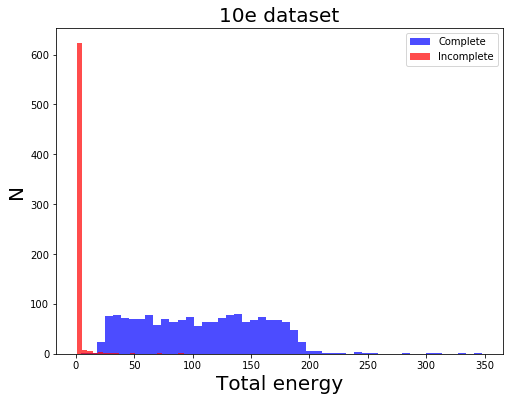

In [46]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comTotE, bins=50, color='b', alpha=0.7,label='Complete')
plt.hist(inComTotE, bins=20, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Total energy",fontsize=20)
plt.title(datasetName,fontsize=20)
plt.show()

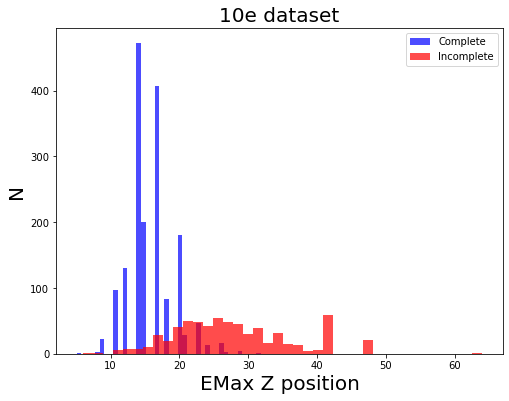

In [47]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comMaxE_z, bins=40, color='b', alpha=0.7,label='Complete')
plt.hist(inComMaxE_z, bins=40, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("EMax Z position",fontsize=20)
plt.title(datasetName,fontsize=20)
plt.show()

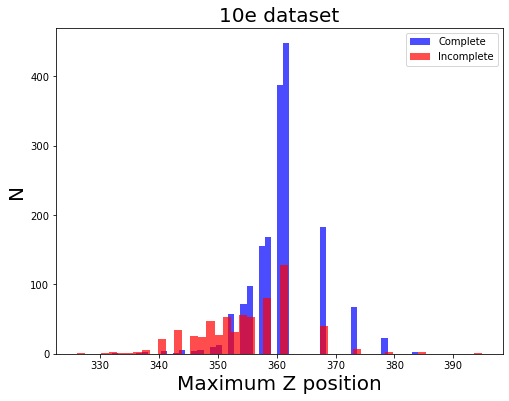

In [48]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comMaxAbs_z, bins=50, color='b', alpha=0.7,label='Complete')
plt.hist(inComMaxAbs_z, bins=50, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Maximum Z position",fontsize=20)
plt.title(datasetName,fontsize=20)
plt.show()


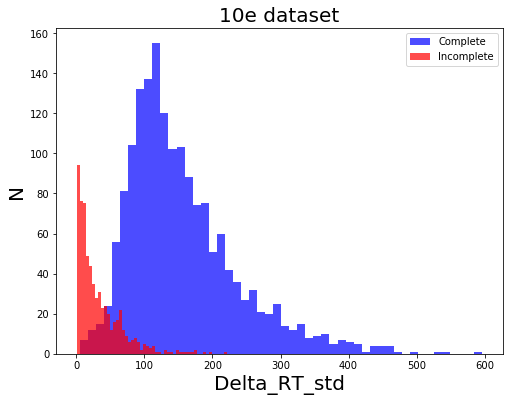

In [49]:
%matplotlib inline

plt.figure(figsize=(8,6))
n, bins, patches = plt.hist(comDelta_RT_std, bins=50, color='b', alpha=0.7,label='Complete')
plt.hist(inComDelta_RT_std, bins=50, color='r', alpha=0.7,label='Incomplete')
plt.legend()
plt.ylabel("N",fontsize=20)
plt.xlabel("Delta_RT_std",fontsize=20)
plt.title(datasetName,fontsize=20)
plt.show()